# Naive Baeyes Algorithm
It is a very simple classificiation based on **Baeyes Theorem**.
Assumptions:
- ### IID:
It states that all the features which are used in classification are independent and identical from each other.
    - **Independent**: This means that each feature is purely independent of each other and one does not effect another.
    - **Identical**: This means that we are assuming that each of the feature is obtained from the same distribution , in this case Mullitvariate Gaussian.
#### Baeyes Theorem:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
For machine learning , naive baeyes can be written as :
$$P(class|data) = \frac{P(data|class)P(class)}{P(data)}$$
- P(class) : Prior Probability , it is the probability of class in the given dataset.
- P(data): Total probability 
- P(data|clas) : Likelihood Probability , probability of class having a given data value associated to it.
- P(class| data) : Posterior Probability , probability of data having a particular class

![](https://i.ytimg.com/vi/eho8xH3E6mE/hqdefault.jpg)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import seaborn as sns 
import plotly as py
import plotly.express as px



### Reading the data 

In [4]:
raw_data=pd.read_csv("data.csv")

In [5]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
raw_data.info()
# Hence no null values found in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Making a copy of data so that no unwanted changes happen to the original data
raw_data_copy = raw_data.drop(labels=[raw_data.columns[0],raw_data.columns[32]],axis=1)

In [8]:
raw_data_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preparing the dataset

In [9]:
class PrepareData:
    def __init__(self,data):
        self.data = data
        self.positive_class_data = None
        self.negative_class_data = None
        self.train_data = None
        self.train_labels = None
        self.test_data = None
        self.test_labels = None
    def separateDataUsingClass(self):
        '''
        Separates data into negative and positive class
        Negative Class : Data points with diagnosis equal to "B"
        Positive Class : Data points with diagnosis equal to "M"
        '''
        self.negative_class_data = self.data[self.data['diagnosis'] == 'B']
        self.positive_class_data = self.data[self.data['diagnosis'] == 'M']
#         return self.positive_class_data , self.negative_class_data
    def train_test_split(self):
        '''
        This function first divides the positive and negative data into train data and test data
        Then concatenates a different class data into train_data and test_data.
        It also preapres train_labels and test_labels.
        
        Returns :
        train_data -> training dataset with both positive and negative class data
        train_labels -> training labels with the "B" , "M" replaced with "False" and "True"
        test data -> test dataset with positive and negative class data.
        test_labels - test labels with the "B" , "M" replaced with "False" and "True"
        '''
        number_of_training_data_rows = int(0.8*self.data.shape[0])
        self.separateDataUsingClass()
        negative_class_training_data = self.negative_class_data.iloc[0:number_of_training_data_rows//2]
        negative_class_test_data = self.negative_class_data.iloc[number_of_training_data_rows//2:]
        positive_class_training_data = self.positive_class_data.iloc[0:number_of_training_data_rows//2]
        positive_class_test_data = self.positive_class_data.iloc[number_of_training_data_rows//2:]
        self.train_data  = pd.concat([positive_class_training_data,negative_class_training_data])
        self.test_data = pd.concat([positive_class_test_data,negative_class_test_data])
        self.train_labels = self.train_data['diagnosis']
        self.train_labels.replace(to_replace=['B','M'],value=[False,True],inplace=True)
        self.test_labels = self.test_data['diagnosis']
        self.test_labels.replace(to_replace=['B','M'],value=[False,True],inplace=True)
        return self.train_data, self.train_labels,self.test_data , self.test_labels
    

In [10]:
data = PrepareData(raw_data_copy)

In [11]:
train_data , train_labels , test_data ,test_labels = data.train_test_split()

In [15]:
px.histogram(data_frame=train_data , x = "radius_mean",color="diagnosis",title="Radius Mean Probablity Distribution")

In [16]:
px.histogram(data_frame=train_data , x = "texture_mean",color="diagnosis",title="Texture Mean Probablity Distribution")

In [17]:
px.histogram(data_frame=train_data , x = "perimeter_mean",color="diagnosis",title="Texture Mean Probablity Distribution")

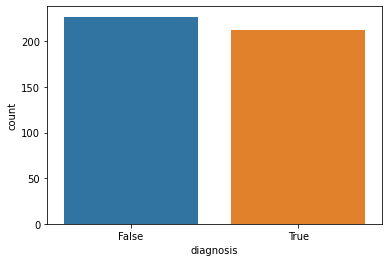

In [18]:
# Hence no data imbalance is present here
train_data["diagnosis"].value_counts()
sns.countplot(x = 'diagnosis',data=train_data)

### MVU Estimator:
Here we are trying to estimate the paramters of a distribution so as to calculate the likelihood probability.
We will find **minimum variance unbiased estimator** which is the closest estimation of the parameter for the distribution.
- In case of normal distribution , mvu estimator would be mean(mu) and standard deviation(sigma).
- But in this since we are using the Joint Gaussian the estimators will be : **mean(mu)** , **covariance matrix** 
**Note*: \
The covariance  matrix must be invertible .Since the determinant is in denominator of the formula of multivariate Gaussian.

In [20]:
class NaiveBaeyesClassifier:
    def __init__(self,train_data , train_labels , test_data ,test_labels):
        self.train_data=train_data
        self.train_labels=train_labels
        self.test_data=test_data
        self.test_labels = test_labels
        self.mu_negative = None
        self.mu_positive = None
        self.cov_mat_negative = None
        self.cov_mat_positive = None
        self.likeli_neg = None
        self.likeli_pos = None
        self.posterior_pos = None
        self.boolean_mask = None
        self.likeli_neg_test = None
        self.likeli_pos_test = None
        self.posterior_pos_test = None
        self.boolean_mask_test= None
        self.train_accuracy = None
        self.test_accuracy = None
    def MVUE(self):
        '''
        Calculate the MVU estimates for Normal Distribution i.e., mean(mu) and covariance matrix(for multivariate joint gaussian)
        It calculates the mean and covariance for both positive and negative class separetely
        '''
        self.mu_negative = self.train_data[self.train_data['diagnosis']== False].iloc[:,1:3].mean()
        self.mu_positive = self.train_data[self.train_data['diagnosis']== True].iloc[:,1:3].mean()
        self.cov_mat_negative = self.train_data[self.train_data['diagnosis']== False].iloc[:,1:3].cov()
        self.cov_mat_positive = self.train_data[self.train_data['diagnosis']==True].iloc[:,1:3].cov()
        if np.linalg.det(self.cov_mat_negative) == 0 or np.linalg.det(self.cov_mat_positive) == 0:
            print("Covariance Matrix is not inversible , hence cannot calculate likeli hood probability")
    def likelihood_probabilities(self):
        '''
        Calculates the likelihood probabilities for both train and test data with positive and negative classes seprarately
        '''
        self.MVUE()
        self.likeli_neg = s.multivariate_normal.pdf(self.train_data.iloc[:,1:3],self.mu_negative,self.cov_mat_negative)
        self.likeli_pos = s.multivariate_normal.pdf(self.train_data.iloc[:,1:3],self.mu_positive,self.cov_mat_positive)
        self.likeli_neg_test = s.multivariate_normal.pdf(self.test_data.iloc[:,1:3],self.mu_negative,self.cov_mat_negative)
        self.likeli_pos_test = s.multivariate_normal.pdf(self.test_data.iloc[:,1:3],self.mu_positive,self.cov_mat_positive)
    def posterior_probabilities(self):
        '''
        Posterior probailites for both the test and train data for positive class 
        '''
        self.likelihood_probabilities()
        self.posterior_pos = self.likeli_pos / (self.likeli_neg + self.likeli_pos)
        self.posterior_pos_test = self.likeli_pos_test / (self.likeli_neg_test + self.likeli_pos_test)
    def boolean(self):
        '''
        To get the accuracy we will need to compare the given labels to our prediction.
        For that purpose we use boolean masking .If the posterior probabilities are greater than 0.5 then they will be
        classified as positive class otherwise negative class.
        '''
        self.posterior_probabilities()
        self.boolean_mask = self.posterior_pos >0.5
        self.boolean_mask_test = self.posterior_pos_test > 0.5
        self.boolean_mask,self.boolean_mask_test 
    def accuracy(self):
        '''
        Using boolean masks to calculate the train and test accuracy for the algorithm
        Return :
        train_accuracy -> Accuracy of algorithm on train data
        test_accuracy -> Accuracy of algorithm on test data 
        '''
        self.boolean()
        correct_data_count = np.sum(self.boolean_mask == self.train_labels)
        correct_data_test = np.sum(self.boolean_mask_test == self.test_labels)
        self.train_accuracy = (correct_data_count / self.train_data.shape[0])*100
        self.test_accuracy = (correct_data_test / self.test_data.shape[0])*100
        return f"Train Accuracy =  {self.train_accuracy}  Test Accuracy =  , {self.test_accuracy}"

In [21]:
model = NaiveBaeyesClassifier(train_data, train_labels,test_data , test_labels)

In [22]:
model.accuracy()

'Train Accuracy =  89.97722095671982  Test Accuracy =  , 79.23076923076923'